# The Erdős-Rényi model

The Erdős-Rényi model is one of the simplest random graph model that exists. It is interesting to study, since it allows you to investigate properties that we also see in other real-life network models in the simplest possible settings. Due to its simplicity, it also allows you to investigate why certain graph algorithms work or break down.

The model has two parameters: $n$ and $p$. The graph is formed by considering the vertex set $V := \{1, 2, 3, \ldots, n\}$. Then, for each pair of vertices $i, j \in V$ such that $i \neq j$ we flip a coin with succes-probability $p$. If this coin lands on heads, then we add the edge $\{i, j\}$ to the edge set $E$ of the graph. If the coin lands tails, we do not add the edge. Once all pairs of vertices have been considered, the graph $G = (V, E)$ is the realization of the  Erdős-Rényi model.

**Exercise 1.** Implement the Erdős-Rényi model as described above as a function ``ER(n, p)``. Make sure it outputs the vertex list $V$ and the edge list $E$. 

In [2]:
import numpy as np

def ER(n, p):
    V = []
    E = []

    for i in range(n):
        V.append(i)
        for j in range(i + 1, n):
            if np.random.rand() < p:
                E.append((i, j))

    return V, E

V, E = ER(10, 0.3)
print("Vertices:", V)
print("Edges:", E)

Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 3), (0, 7), (0, 9), (1, 2), (1, 3), (1, 7), (1, 8), (1, 9), (2, 7), (2, 8), (3, 7), (3, 9), (4, 8), (5, 8), (5, 9), (6, 7), (8, 9)]


## The Erdős-Rényi model in NetworkX and sparsity

The *NetworkX* package in Python has out-of-the-box modules to generate instances of the Erdős-Rényi model. The simplest of these is simply called ``erdos_renyi_graph``. This function is usefull to generate instances of the Erdős-Rényi model when $p$ is relatively big. Below is some code that generates an instance of the model using NetworkX, and extracts the vertex list and edge list.

In [3]:
import networkx as nx

#Generate the graph in NetworkX
n = 100
p = 0.5
G = nx.erdos_renyi_graph(n, p)

#Extract the vertex and edge list
V, E = np.array(G.nodes), np.array(G.edges)

Although the ``erdos_renyi_graph`` function is usefull in generating instances of the model, it is not the best option if $p$ is very small compared to $n$. Specifically, if $p n^2 < n^r$ for some power $r < 2$, then the function ``fast_gnp_random_graph`` is a faster way to generate an instance of the Erdős-Rényi model for $n$ large. Note that $G(n, p)$ is an alternative name for the Erdős-Rényi model. Below is an example where this alternative function is used.

In [10]:
#Generate the graph in NetworkX
n = 100
p = 0.5
G = nx.fast_gnp_random_graph(n, p)

#Extract the vertex and edge list
V, E = np.array(G.nodes), np.array(G.edges)

**Exercise 2.** Consider the Erdős-Rényi model with parameters $n$ and $p = 1/n$. Generate instances of the model for $n = 1000 \cdot 2^k$ with increasing integer values of $k$. Record how long each instance takes. Plot the results on a log-log scale to get an idea of the time complexity of the graph generation algorithms. To generate your instances, use your algorithm from **Exercise 1**, ``erdos_renyi_graph`` and ``fast_gnp_random_graph``. What can you say about the speed of the algorithms based on the figure?

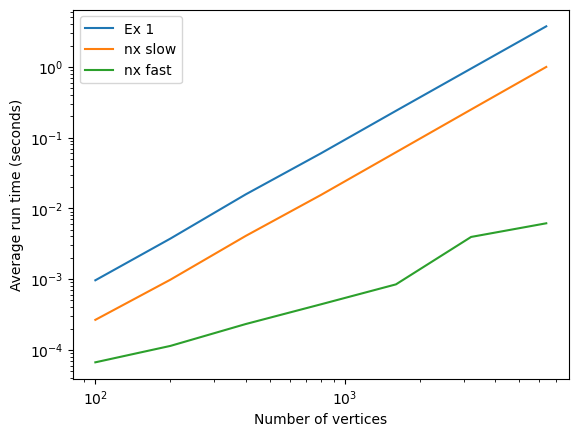

In [4]:
from matplotlib import pyplot as plt
import time

#Inputs
noVals = 7
k = np.arange(noVals)
n = 100 * 2**k
p = 1 / n

#Vectors for numerical results
noIterations = 20
timeresults = np.zeros((noVals, noIterations, 3))

#Do experiments
for i in range(noVals):
    for j in range(noVals):
        t0 = time.time()
        _, _ = ER(n[i], p[i])
        t1 = time.time()
        _ = nx.erdos_renyi_graph(n[i], p[i])
        t2 = time.time()
        _ = nx.fast_gnp_random_graph(n[i], p[i])
        t3 = time.time()
        timeresults[i, j, :] = np.array([t1 - t0, t2 - t1, t3 - t2])

#Average and plot the experiments
plotresults = np.average(timeresults, axis = 1)
plt.loglog(n, plotresults[:,0], n, plotresults[:,1], n, plotresults[:,2])
plt.legend(["Ex 1", "nx slow", "nx fast"])
plt.ylabel("Average run time (seconds)")
plt.xlabel("Number of vertices")
plt.show()

## Properties of the Erdős-Rényi model

Despite its simplicity, the Erdős-Rényi model has many interesting properties that we also see in real-life networks. For example, we can see in the Erdős-Rényi model that with relatively few (expected number of) edges we can attain pretty big connected components in the graph. It turns out that the largest connected component of the Erdős-Rényi model contains more that $\varepsilon n$ vertices for some small $\varepsilon > 0$ if we consider the model with $n$ vertices and an edge probability of $\lambda / n$ with $\lambda > 1$. Thus, we have a linear number of vertices in the largest connected component while the expected number of edges is $\lambda n$ (which is also linear).

**Exercise 3.** Verify the above statement. You can do this as follows: start by taking e.g. $n = 10000$, and generate for a fixed $\lambda$ multiple instances of the Erdős-Rényi model with $p = \lambda / n$. For each instance, compute the amount of vertices in the largest connected component, and averaging the result over all instances. Denote this result by $|\mathcal{C}_{\max}(\lambda)|$. Then, repeat this procedure for other values of $\lambda$ and plot $ |\mathcal{C}_{\max}(\lambda)|/ n$ as a function of $\lambda$. 

*Hint: Don't code all algorithms yourself. Use NetworkX.*

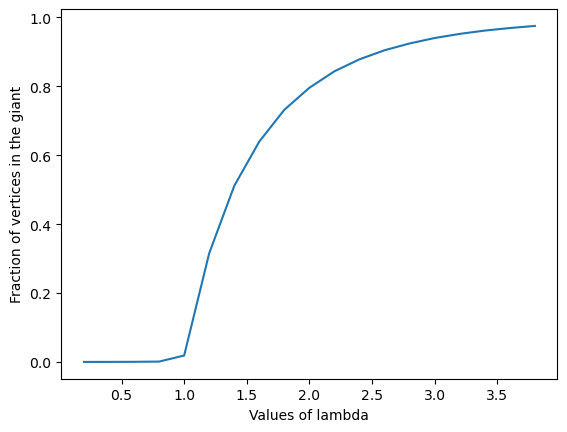

In [5]:
#input parameters
lambdas = np.arange(0.2, 4, 0.2)
itNo = 10
n = 100000
pvals = lambdas / n

#data storage
avSize = np.zeros_like(lambdas)

#Experiments
for i, p in enumerate(pvals):
    for _ in range(itNo):
        G = nx.fast_gnp_random_graph(n, p)
        largest_cc = len(max(nx.connected_components(G), key=len))
        avSize[i] += largest_cc / (itNo * n)
        
#Plotting the results
plt.plot(lambdas, avSize)
plt.xlabel("Values of lambda")
plt.ylabel("Fraction of vertices in the giant")
plt.show()

Of course, due to its simplicity the Erdős-Rényi model also has a lot of properties that do not really correspond to real networks. For example, while real-world networks often have few edges, you still expect to find many triangles within them. In the Erdős-Rényi model this is not the case.

**Exercise 4.** Fix a value of $\lambda$ and consider the Erdős-Rényi model with parameters $n$ and $p = \lambda / n$. Show through simulations that, as $n \to \infty$, the number of triangles in this model goes to zero if you divide it by $n$. For each value of $n$ be sure to consider multiple instances of the model to insure randomness influences your results minimally.

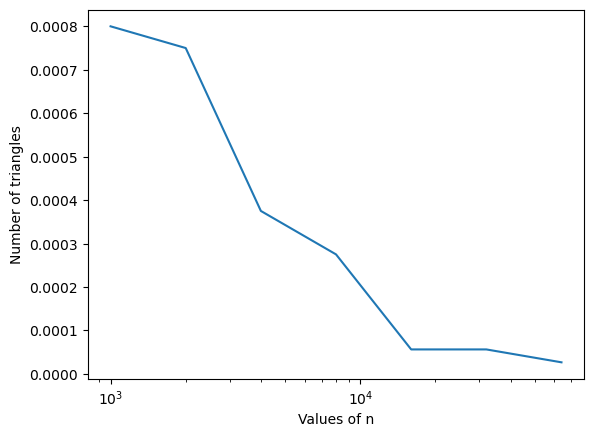

In [6]:
#Inputs
lam = 2
k = np.arange(7)
n = 1000 * 2**k
p = lam / n
itNo = 10

#Triangle count container
triag = np.zeros_like(p)

#Experiments
for i, _ in enumerate(n):
    for _ in range(itNo):
        G = nx.fast_gnp_random_graph(n[i], p[i])
        trianglesNo = np.sum(list(nx.triangles(G).values()))/3
        triag[i] += trianglesNo / (n[i] * itNo)
        
#Plotting the results
plt.plot(n, triag)
plt.xscale("log")
plt.xlabel("Values of n")
plt.ylabel("Number of triangles")
plt.show()